In [257]:
# Our usual libraries for working with data
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

# Our usual libraries for visualizing data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sb

# Spatial libaries
import geopandas as gpd
import geoplot, contextily

Research Question: What is the correlation between the CU Boulder population and active liquor licenses since 1991?
Hypothesis: I think that there will be a positive correlation between the two, meaning that there will be more active liquor licenses as the CU student population grows. I also think that there might be a plateau when cannabis becomes legalized.
Motivation: My motivation behind this is that I am a student at CU Boulder and it was interesting to read about how there was a massive increase in sales after coronavirus hit. After just taking a quick look at the data, there has been about an increase of 9,000 students since 1991, which is pretty big considering how Boulder is not a very big place. However, there is also a tradeoff for businesses since the population goes down significantly over the summer. So, with this in mind, I am curious about how many businesses have decided to get liquor licenses because college kids drink a lot.


In [121]:
current_business_license_df = pd.read_csv('Active_Business_Licenses.csv')

In [168]:
print(current_business_license_df.shape)
current_business_license_df['City'] = current_business_license_df['City'].str.upper()
current_business_license_df.sort_values(by=['City', 'NAICS_Description'])  
current_business_license_df.head()



(13656, 9)


,ObjectId,DOING BUSINESS AS,License_Effective_Date,NAICS_Code,NAICS_Description,Exempt,City,State,Zip_Code
0,1,A & E VENDING LLC,2018-04-15,'05-5900,MISC RETAIL,No,BOULDER,CO,80301
1,2,A & M AUTOMOTIVE,1991-11-11,'10-7538,GENERAL AUTO REPAIR,No,BOULDER,CO,80304
2,3,A AND A QUALITY APPLIANCE,1990-07-01,'10-7629,ELECTRICAL REPAIR SHOPS,No,BOULDER,CO,80302
3,4,A BEAUTIFUL MEMORY,1995-01-01,'05-5963,HOME BASED & DIRECT SALES,No,BOULDER,CO,80303
4,5,A CHANGE IN GREENERY INC,1989-03-01,'05-5963,HOME BASED & DIRECT SALES,No,LOVELAND,CO,80538


In [123]:
current_business_license_df = current_business_license_df.rename(columns={'DBA_Name': 'DOING BUSINESS AS'})

In [124]:
current_business_license_df = current_business_license_df.replace({'###############################################################################################################################################################################################################################################################':np.NaN})

In [125]:
current_business_license_df['License_Effective_Date'] = pd.to_datetime(current_business_license_df['License_Effective_Date'])

My current_business_license_df contains a list of businesses that have licenses. This data really is not that helpful for me since a lot of them I will need to cut out, but it does say when the license became effective. In addition to liquor stores, I will need to find restaurants that have liquor licenses.

In [126]:
liquor_license_df = pd.read_csv('Liquor Licenses csv11.2.2020_0.csv')

In [127]:
new_liquor_license_df = liquor_license_df.drop([0],axis=0)

In [128]:
new_header = new_liquor_license_df.iloc[0]
new_liquor_license_df=liquor_license_df[1:]
new_liquor_license_df.columns = new_header

In [129]:
new_liquor_license_df = new_liquor_license_df.drop([1])

In [130]:
new_liquor_license_df.head()

1,LICENSEE NAME,DOING BUSINESS AS,LICENSE #,LICENSE TYPE,EXPIRES,STREET ADDRESS,CITY,STATE,ZIP
2,7908 ASPEN,"""7908""",NaN,Sidewalk Service Area,NaN,415 EAST HYMAN AVENUE,Aspen,CO,81611
3,7908 ASPEN LLC,"""7908""",03-09732,Hotel & Restaurant (city),05/01/2021,415 EAST HYMAN AVENUE,Aspen,CO,81611
4,PARK THEATER MALL LLC,"""THE SLAB"" & PARK THEATRE CAFE",03-01524,Tavern (city),06/23/2021,116 EAST ELKHORN AVENUE,Estes Park,CO,80517
5,HORNS MANAGEMENT LLC,#1 THE OLD FIREHOUSE,03-03332,Tavern (city),10/05/2020,0030 B JACKSON ST,South Fork,CO,81154
6,#VYBE LLC,#VYBE,03-07942,Tavern (city),06/25/2021,1027 NORTH BROADWAY,Denver,CO,80203


In [132]:
new_liquor_license_df['EXPIRES'] = pd.to_datetime(new_liquor_license_df['EXPIRES'])

In [134]:
new_liquor_license_df.loc[new_liquor_license_df['DOING BUSINESS AS'] == 'BASELINE LIQUOR']

1,LICENSEE NAME,DOING BUSINESS AS,LICENSE #,LICENSE TYPE,EXPIRES,STREET ADDRESS,CITY,STATE,ZIP
1514,EPG ENTERPRISES INC,BASELINE LIQUOR,03-13465,Liquor Store (city),2021-06-23,2750 BASELINE ROAD,Boulder,CO,80305


new_liquor_license_df lists all of the businesses that have a liquor license in Colorado. I just cleaned up the data a little to make it easier to combine with current_business_license_df. I also wanted to double check if it is by title. Since Baseline Liquor is near my house, I was just testing to see if the names are what I would expect. 

In [135]:
combined_liquor_business_df = pd.merge(current_business_license_df, new_liquor_license_df, how = 'inner', on = 'DOING BUSINESS AS')

In [170]:
#combined_liquor_business_df.tail()

In [139]:
combined_liquor_business_df['CITY'] = current_business_license_df['City'].str.upper()

In [141]:
combined_boulder_df = combined_liquor_business_df.loc[combined_liquor_business_df['CITY'] == 'BOULDER']

In [142]:
combined_boulder_df.head()

,ObjectId,DOING BUSINESS AS,License_Effective_Date,NAICS_Code,NAICS_Description,Exempt,City,State,Zip_Code,LICENSEE NAME,LICENSE #,LICENSE TYPE,EXPIRES,STREET ADDRESS,CITY,STATE,ZIP
0,36,A-OK LIQUOR,2015-03-16,'05-5921,LIQUOR STORES,No,BOULDER,CO,80301,JW RAON LLC,03-04904,Liquor Store (city),2021-08-24,2690 28TH STREET UNIT A,BOULDER,CO,80301
1,292,ABO'S PIZZA,2013-06-01,'02-5800,EATING & DRINKING PLACES,No,BOULDER,CO,80304,ABO'S PIZZA WILDCAT INC,03-00999,Beer & Wine (county),2021-04-08,2229 WILDCAT RESERVE PKWY #A-1,BOULDER,CO,80129
2,292,ABO'S PIZZA,2013-06-01,'02-5800,EATING & DRINKING PLACES,No,BOULDER,CO,80304,SANABRIA ENTERPRISE INC,02-84851-0002,Hotel & Restaurant (city),2021-06-08,1355 SOUTH BOULDER ROAD C2,BOULDER,CO,800272312
3,292,ABO'S PIZZA,2013-06-01,'02-5800,EATING & DRINKING PLACES,No,BOULDER,CO,80304,SANABRIA ENTERPRISE INC,02-84851-0004,Hotel & Restaurant (city),2021-03-29,720 AUSTIN RD #104,BOULDER,CO,805162422
5,293,ABO'S PIZZA,1997-02-07,'02-5812,EATING PLACES,No,BOULDER,CO,80305,SANABRIA ENTERPRISE INC,02-84851-0002,Hotel & Restaurant (city),2021-06-08,1355 SOUTH BOULDER ROAD C2,BOULDER,CO,800272312


combined_boulder_df is the information just for liquor licenses in Boulder. Even though there are two categories for city, I went through and checked the addresses to confirm that the CITY column was actually correct for places in Boulder. 

In [143]:
combined_boulder_df['Year'] = pd.DatetimeIndex(combined_boulder_df['License_Effective_Date']).year

C:\Users\jomcf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
combined_boulder_df.tail()

,ObjectId,DOING BUSINESS AS,License_Effective_Date,NAICS_Code,NAICS_Description,Exempt,City,State,Zip_Code,LICENSEE NAME,LICENSE #,LICENSE TYPE,EXPIRES,STREET ADDRESS,CITY,STATE,ZIP,Year
364,13371,WHOLE FOODS MARKET,1998-02-01,'01-5411,GROCERY STORES,No,BOULDER,CO,80301,WHOLE FOODS MARKET ROCKY MOUNTAIN / SOUTHWEST LP,04-00927,Fermented Malt Beverage Off (city),2021-11-26,2905 PEARL STREET,BOULDER,CO,80301,1998
368,13371,WHOLE FOODS MARKET,1998-02-01,'01-5411,GROCERY STORES,No,BOULDER,CO,80301,WHOLE FOODS MARKET ROCKY MOUNTAIN/ SOUTHWEST L.P.,04-00786,Fermented Malt Beverage Off (city),2021-06-19,7635 NORTH ACADEMY BOULEVARD,BOULDER,CO,80920,1998
374,13371,WHOLE FOODS MARKET,1998-02-01,'01-5411,GROCERY STORES,No,BOULDER,CO,80301,WHOLE FOODS MARKET ROCKY MOUNTAIN/SOUTHWEST LP,04-00882,Fermented Malt Beverage Off (city),2021-09-27,5155 SOUTH WADSWORTH BOULEVARD,BOULDER,CO,80123,1998
380,13537,WILD WOODS BREWERY INC,2012-08-01,'10-2082,MALT BEVERAGES MFG,No,BOULDER,CO,80301,WILD WOODS BREWERY INC,28-73934-0001,Wholesale Beer (malt liquor),2021-03-31,5460 CONESTOGA CT,BOULDER,CO,803012724,2012
387,13647,iPIE,2018-03-03,'02-5812,EATING PLACES,No,BROOMFIELD,CO,80020,"INFINITUS, INC",03-01070,Beer & Wine (city),2021-03-13,145 NICKEL STREET,BOULDER,CO,80020,2018


I wanted to create a separate column so I could sort out the year the licenses became active so I could put it in a graph.

Text(0, 0.5, 'Licenses')

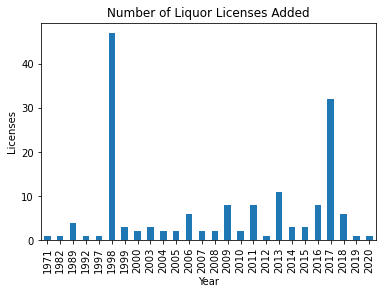

In [165]:
year_plot = combined_boulder_df['Year'].value_counts(sort = False)
year_plot.plot(kind = 'bar')
plt.title('Number of Liquor Licenses Added')
plt.xlabel('Year')
plt.ylabel('Licenses')

This graph shows how many liquor licenses were added per year. It is very important to note that this is NOT the totals per year. There is positive growth overall and almost every year has had a license added. 

In [148]:
admissions_df = pd.read_csv('CU Boulder Admissions Since 1991.csv')

admissions_df is the dataset from CU Boulder's student population. The total row will be the most useful for me because I am comparing amount of college students. I can see there is an overall increase in student pop, but there is a drop between 2019 and 2020, which could be related to COVID.

In [150]:
new_admissions_df = admissions_df.drop(columns = ['College'])

In [151]:
admissions_final_df = new_admissions_df.set_index('Type')

In [153]:
#https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
admissions_final_df = admissions_final_df.replace(',','', regex=True)

In [154]:
#admissions_final_df.astype(str).astype(int)
admissions_final_df

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New frosh,3444,3604,3436,3603,4182,3952,4248,4281,4566,5095,4982,5391,5571,5138,5007,5617,5555,5833,5519,5160,5663,5469,5844,5869,6208,6439,6570,6701,7113,6326
Transfers,1759,1455,1755,1720,1431,1459,1491,1326,1436,1350,1386,1435,1474,1433,1301,1241,1297,1318,1358,1167,1300,1195,1292,1312,1119,1203,1440,1622,1555,1409
IUT's,761,862,722,774,687,820,841,880,857,936,810,935,830,831,843,825,774,785,802,820,843,845,783,875,936,1320,1421,1876,1555,1772
Contin/readm,14488,14104,14080,13631,13322,13594,13849,14089,14344,14302,15046,15693,16665,17308,17072,16801,16847,17144,17729,17659,16951,16683,16500,16762,16012,17471,18234,18557,19401,19471
New to campus,5203,5059,5191,5323,5613,5411,5739,5607,6002,6445,6368,6826,7045,6571,6308,6858,6852,7151,6877,6327,6963,6664,7136,7181,7327,7642,8010,8323,8668,7735
New to college,5964,5921,5913,6097,6300,6231,6580,6487,6859,7381,7178,7761,7875,7402,7151,7683,7626,7936,7679,7147,7806,7509,7919,8056,8263,8962,9431,10199,10223,9507
Total,20452,20025,19993,19728,19622,19825,20429,20576,21203,21683,22224,23454,24540,24710,24223,24484,24473,25080,25408,24806,24757,24192,24419,24818,24275,26433,27665,28756,29624,28978
Cum GPA of IUT's,2.96,2.98,3.01,2.99,2.99,3.02,2.97,3.00,3.07,3.10,3.11,3.17,3.16,3.19,3.20,3.17,3.20,3.15,3.11,3.09,3.10,3.09,3.06,3.08,3.06,3.09,3.13,3.10,3.21,3.24


In [155]:
admissions_final_df = admissions_final_df.drop(["Cum GPA of IUT's"],axis=0)

In [157]:
admissions_final_df = admissions_final_df.astype(str).astype(int)

Text(0, 0.5, 'Students')

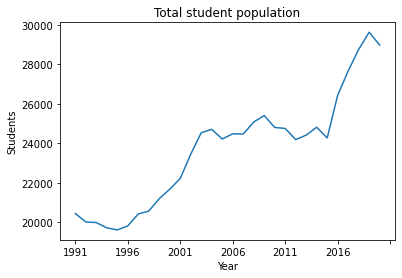

In [159]:
plot_total = admissions_final_df.iloc[6]
plot_total.plot()
plt.title('Total student population')
plt.xlabel('Year')
plt.ylabel('Students')

This graph just shows the overall student population since 1991.

In [160]:
admissions_final_df.loc['Yearly Difference'] = admissions_final_df.iloc[6].diff()

Text(0, 0.5, 'Students')

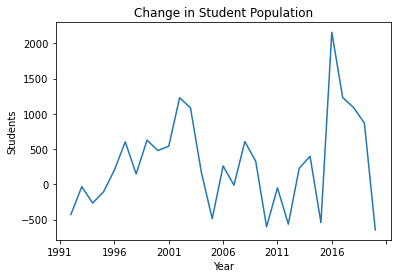

In [162]:
plot_yearly_diff = admissions_final_df.iloc[7]
plot_yearly_diff.plot()
plt.title('Change in Student Population')
plt.xlabel('Year')
plt.ylabel('Students')

What we are looking at here is the difference in student population in comparison to the previous year. This is a really interesting graph because it shows both the decline and increase in student population every year. It makes me think that there will be an increase in places with liquor licenses around 2016 because there is such a jump.
Statement of hypothesis: There will be an increase in active liquor licenses after 2016.

In [215]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
transposed_admissions = admissions_final_df.T

In [216]:
print(transposed_admissions.index)

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [217]:
transposed_admissions = transposed_admissions.drop('1991',axis=0)

Type,New frosh,Transfers,IUT's,Contin/readm,New to campus,New to college,Total,Yearly Difference
1992,3604.0,1455.0,862.0,14104.0,5059.0,5921.0,20025.0,-427.0
1993,3436.0,1755.0,722.0,14080.0,5191.0,5913.0,19993.0,-32.0
1994,3603.0,1720.0,774.0,13631.0,5323.0,6097.0,19728.0,-265.0
1995,4182.0,1431.0,687.0,13322.0,5613.0,6300.0,19622.0,-106.0
1996,3952.0,1459.0,820.0,13594.0,5411.0,6231.0,19825.0,203.0


When graphing this data, I kept running into problems because 1991 had an NaN, so I just decided to drop the 1991 row.

Text(0, 0.5, 'Students')

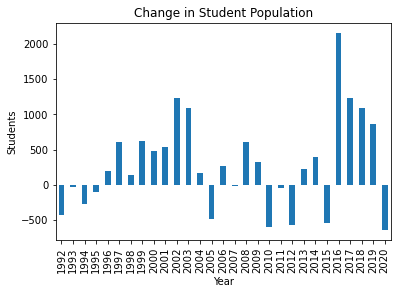

In [228]:
transposed_graph = transposed_admissions['Yearly Difference']
transposed_graph.plot(kind = 'bar')
plt.title('Change in Student Population')
plt.xlabel('Year')
plt.ylabel('Students')

Text(0, 0.5, 'Licenses')

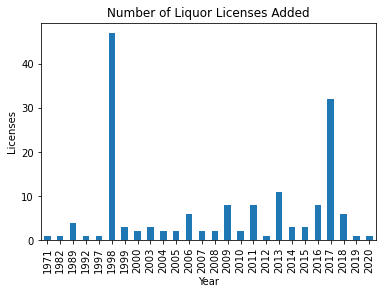

In [261]:
year_plot = combined_boulder_df['Year'].value_counts(sort = False)
year_plot.plot(kind = 'bar')
plt.title('Number of Liquor Licenses Added')
plt.xlabel('Year')
plt.ylabel('Licenses')

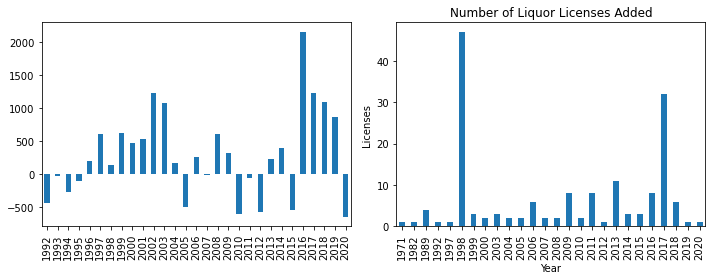

In [264]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
transposed_graph.plot(kind = 'bar', ax=ax1)
year_plot.plot(kind = 'bar', ax=ax2)

plt.title('Number of Liquor Licenses Added')
plt.xlabel('Year')
plt.ylabel('Licenses')

plt.tight_layout()

I put this just to reiterate so that I can compare the two graphs. I tried a lot of ways to combine the graphs, but I could never figure out how to align the x-axis because the values were not exact. Anyway, this is still fine for me because I wanted to compare changes in student population and liquor licenses. So on the left, we are looking at transposed_graph, which is the changes in student population yearly. This graph is nice because we can see when there are big jumps in the student population. The graph on the right, which is year_plot is also nice because we can look at the increase in liquor licenses yearly and this graph makes is VERY obvious when there are jumps. 
From transposed_graph, the first thing to notice is the increase in student population between 1995-1997. There is a relatively significant increase. In comparison to year_plot, we see a gigantic increase in liquor licenses. In fact, it was the biggest increase we can see since 1971. Honestly, I am not 100% convinced that these are directly related since the student population did not increase by that much, but there is definitely a strong correlation because 1998 was the year after a relatively big jump in student population. When looking at getting a liquor license, the young population is definitely important because college kids are very likely to go out and party. 
However, we do not see a big jump in the amount of liquor licenses again until 2017. This is what I predicted initially because I saw that big jump between student population between 2015-2016. Naturally, that is when i predicted a big jump, which I do think those are directly related. There were definitely limitations to this project. I would have liked to see all of the liquor licenses administered. However, the dataset that I found only showed active ones, which makes sense, but it would be interesting to see if that was also correlated. Another reason I would have liked that is because if I had decided to look at the amount of liquor licenses yearly, there would only have been an increase because I would not be able to see if any expired and were not renewed or those taken away. 
Overall, there was definitely a positive correlation between the amount of liquor licenses administered and the increase in student popoulation. The biggest indicator of this for me is that the year after there were jumps in student population, there were jumps in the amount of liquor licenses. So, I would say that the young population is pretty essential to alcohol sales. 